In [8]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 250
    std = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix))) * np.sqrt(250)
    return std, returns
    

In [4]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for x in range(num_portfolios):
        weights = np.random.random(len(assets))
        weights /= np.sum(weights)
        weights_record.append(weights)
        port_std, port_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0, x] = port_std
        results[1, x] = port_return
        results[2, x] = (port_return - risk_free_rate) / port_std
    return results, weights_record

In [5]:
returns = pf_data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
risk_free_rate = 0.007
num_portfolios = 10000

In [9]:
def optimal_portfolio_weight():
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=pf_data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualized Return:", round(rp,4))
    print ("Annualized Volatility:", round(sdp,4))
    print ("\n")
    print (str(max_sharpe_allocation) + ' %')
    print ("-"*80)

    plt.figure(figsize = (10,6))
    plt.xlabel('Annualized Volatility')
    plt.ylabel('Annualized Return')
    plt.scatter(results[0,:], results[1,:])

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.1015
Annualized Volatility: 0.1541


               PG  ^GSPC
allocation  65.32  34.68 %
--------------------------------------------------------------------------------


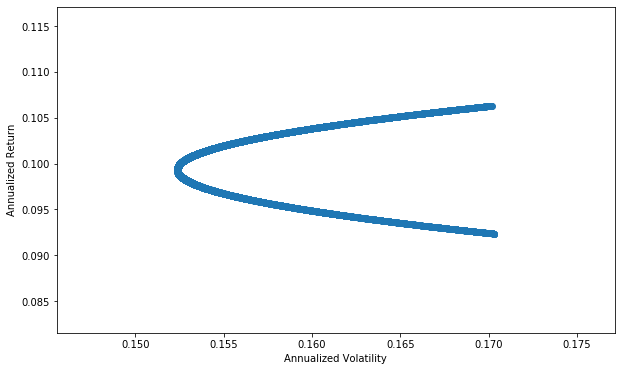

In [10]:
optimal_portfolio_weight()